# Superstore-Data-Analysis

Today I am going to work on a Super store dataset to analyse to data and get some useful insights about the features available, which in-turn will help the organisation to improve their business and increase their profit. I found this dataset an ideal real-life dataset to implement all I have learnt from the Zero to Pandas workshop arranged by Jovian.ml.
So, without wasting any more time we will jump straight to Data Cleaning or Pre-processing after downloading the dataset into the environment.

## Downloading the Dataset

I have collected the dataset from Kaggle itself. We are having a Zip file within which the .csv file is present. So, we will go step by step to download the dataset, unzip it and import it to proceed further in our project.

In [2]:
!pip install jovian opendatasets --upgrade --quiet


[notice] A new release of pip is available: 23.1 -> 23.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
# getting the URL of the dataset to download the same
dataset_url = 'https://www.kaggle.com/bravehart101/sample-supermarket-dataset' 

In [4]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:

Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:Your Kaggle username:

The dataset has been downloaded and extracted.

In [ ]:
data_dir='./sample-supermarket-dataset'

In [ ]:
import os
os.listdir(data_dir)

['SampleSuperstore.csv']

In [ ]:
project_name = "superstore-data-analysis"

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

<IPython.core.display.Javascript object>

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Please enter your API key ( from https://jovian.ml/ ):
API KEY: ········
[jovian] Uploading notebook to https://jovian.ml/mukherjeesubha24/superstore-data-analysis


<IPython.core.display.Javascript object>

## Data Preparation and Cleaning

**In this step we will observe our dataset and will clean it as much as possible to avoid any issues during analysis. We will treat the missing values, duplicate entries and also the outliers. All these steps will in turn make our data ready to Explore and get insights accurately.**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#loading the dataset
df= pd.read_csv("Analysis.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
#checking the shape of the dataset
df.shape

(9994, 13)

**We have 9994 rows and 13 columns in our dataset.**

In [5]:
#Checking the column names
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [6]:
#Let's get the total view of the data we have
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
#checking the null values or missing items
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

**So, no null values or missing values are there in the dataset.**

In [8]:
#Checking the continuos and the Categorical Columns
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [9]:
#Checking if any duplicate row is there in the dataset
df.duplicated().sum()

17

**That's interesting! There are total 17 duplicate entries in our dataset! So, let's remove those to avoid any inconvenience.**

In [10]:
#Removing 17 duplicated rows to avoid faults in further calculation
df.drop_duplicates(inplace=True)

In [11]:
#After removing duplicate entries
df.shape

(9977, 13)

**So now we have 9977 rows and 13 columns!**

In [12]:
#removing the unimportant columns
data=df.drop(['Country', 'Postal Code'], axis=1)
data.shape

(9977, 11)

In [14]:
df_con=data.select_dtypes(include=[np.number]) #getting the numeracal features
df_con

,Sales,Quantity,Discount,Profit
0,261.9600,2,0.00,41.9136
1,731.9400,3,0.00,219.5820
2,14.6200,2,0.00,6.8714
3,957.5775,5,0.45,-383.0310
4,22.3680,2,0.20,2.5164
...,...,...,...,...
9989,25.2480,3,0.20,4.1028
9990,91.9600,2,0.00,15.6332
9991,258.5760,2,0.20,19.3932
9992,29.6000,4,0.00,13.3200


<Axes: >

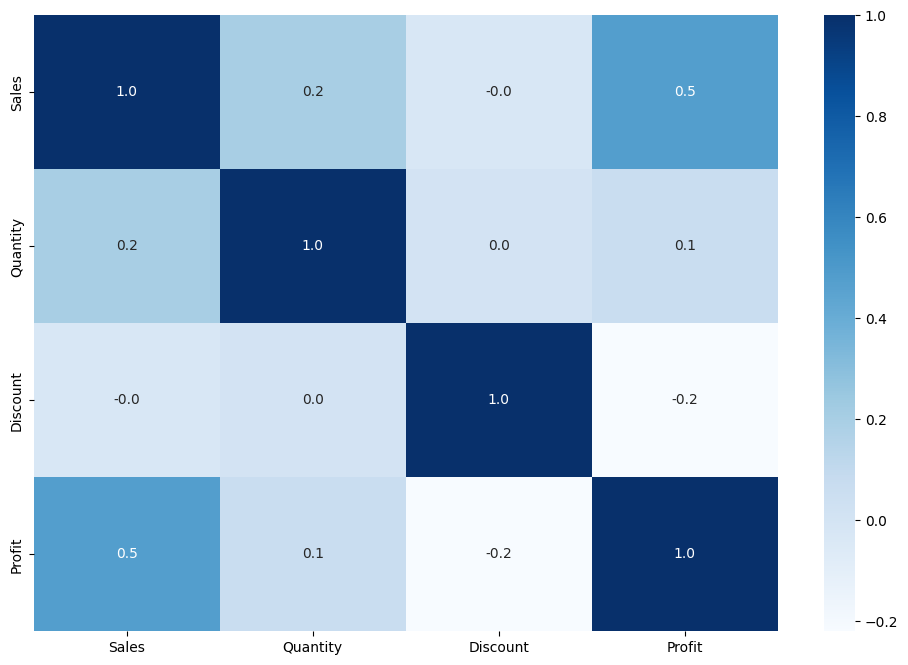

In [13]:
#Checking the corelations between numeric columns

f,ax = plt.subplots(figsize=(12, 8))
sns.heatmap(df_con.corr(method='pearson'), annot=True, fmt= '.1f',ax=ax, cmap="Blues") #plotting a heatmap

**No such strong co-relations are found!**

# Outlier Detection and removal accordingly:-

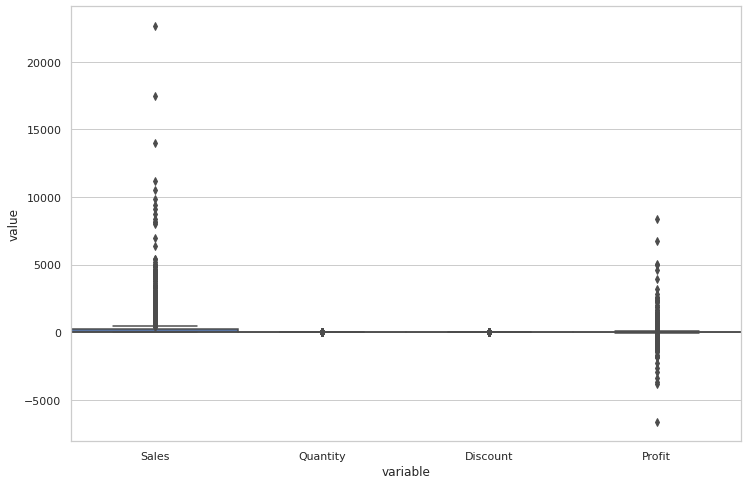

In [22]:
#BoxPlot to see the outliers clearly
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(df_con), width=1)

plt.show()


From the above plot, the outliers im Sales and Profit are clearly seen. As it's a large data set, we can remove those rows containing outliers to improve our results.

In [23]:
#Removal of Outliers
def remove_outlier(dataset,k=3.33):
    for col in dataset.columns:
            if (dataset[col].dtype=="int64" or dataset[col].dtype=="float64"):
                mean = dataset[col].mean()
                global ds      
                std = dataset[col].std()    
                outlier = [i for i in dataset[col] if (i > mean - k * std)]
                outlier = [i for i in outlier if (i < mean + k * std)]       
                ds = dataset.loc[dataset[col].isin(outlier)]

In [24]:
remove_outlier(data,k=3.33)

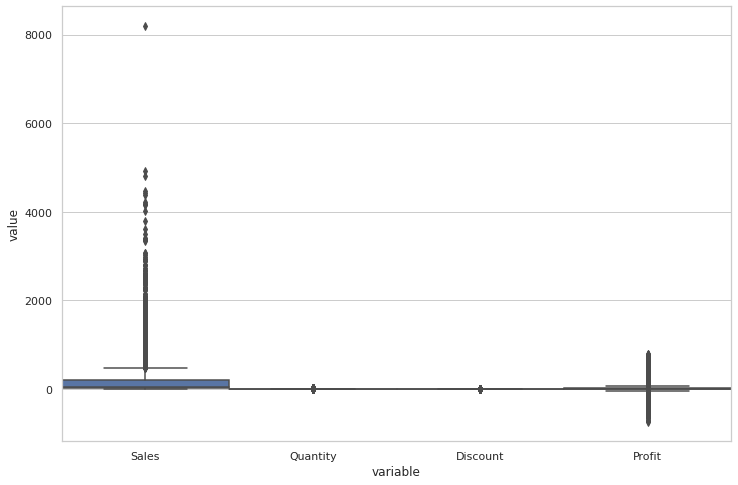

In [25]:
#Let's see the outliers are removed or not
ds_con=ds.select_dtypes(include=[np.number])
plt.figure(figsize=[12,8])
sns.set(style="whitegrid")
sns.boxplot(x="variable", y="value", data=pd.melt(ds_con), width=1)

plt.show()

In [26]:
import jovian

In [27]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/mukherjeesubha24/superstore-data-analysis


<IPython.core.display.Javascript object>

## Exploratory Analysis and Visualization

**Now,as our dataset is clean and ready to perform the analysis, we will visualise the relationships of different features and will try to get some insights to answer the most relevant questions. Not only visualisation, we will go with some imporatant statistical calculations also to enhance the chances of exploring our data efficiently.**



In [28]:
#Let's describe our data once again to get the useful values for each feature
ds.describe()

,Sales,Quantity,Discount,Profit
count,9889.000000,9889.000000,9889.000000,9889.000000
mean,196.570036,3.776519,0.155131,24.150294
std,383.949264,2.222506,0.204991,94.164961
min,0.444000,1.000000,0.000000,-734.526400
25%,17.088000,2.000000,0.000000,1.747200
50%,52.990000,3.000000,0.200000,8.611200
75%,203.520000,5.000000,0.200000,28.857600
max,8187.650000,14.000000,0.800000,793.716000


In [29]:
#What are the numbers of unique entries in the Categorical columns
for col in ds.columns:
    if ds[col].dtype=='object':
        print("Number of unique entries in",col + " are",ds[col].nunique())
        print("=================================================")

Number of unique entries in Ship Mode are 4
Number of unique entries in Segment are 3
Number of unique entries in City are 531
Number of unique entries in State are 49
Number of unique entries in Region are 4
Number of unique entries in Category are 3
Number of unique entries in Sub-Category are 17


**Visualization to Explore and get insights=>**

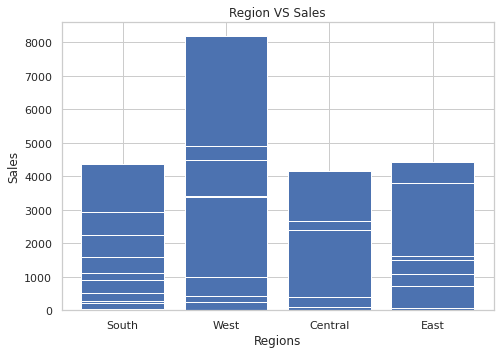

In [30]:
#Region wise sales plot
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ds['Region'],ds['Sales'])
plt.title("Region VS Sales")
plt.xlabel("Regions")
plt.ylabel("Sales")
plt.show()

**Observation:- The West region is leading the sales followed by the East, South and North.**

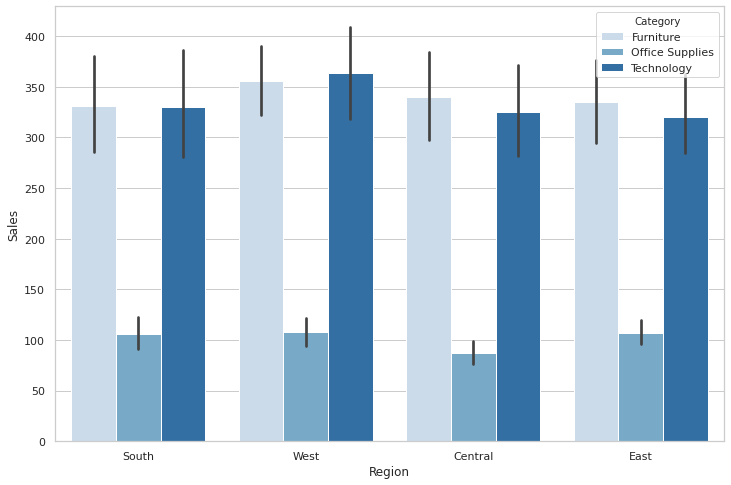

In [31]:
#Category wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Category", data=ds, palette="Blues")

**Observation:- In each and every every region, sales for 'Office Supplies' are very poor. Furniture and Technology are well ahead.**

<Figure size 1080x576 with 0 Axes>

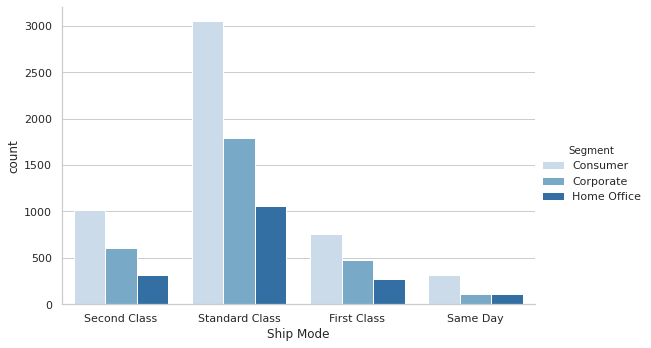

In [32]:
#Segment wise count of the ship modes
plt.figure(figsize=[15,8])
sns.catplot("Ship Mode", hue="Segment", data=ds, kind="count", aspect=1.5, palette="Blues")

**Observation:- No much surprises here. Consumer count is highest in each case and they generally prefer 'Standard Class'.**

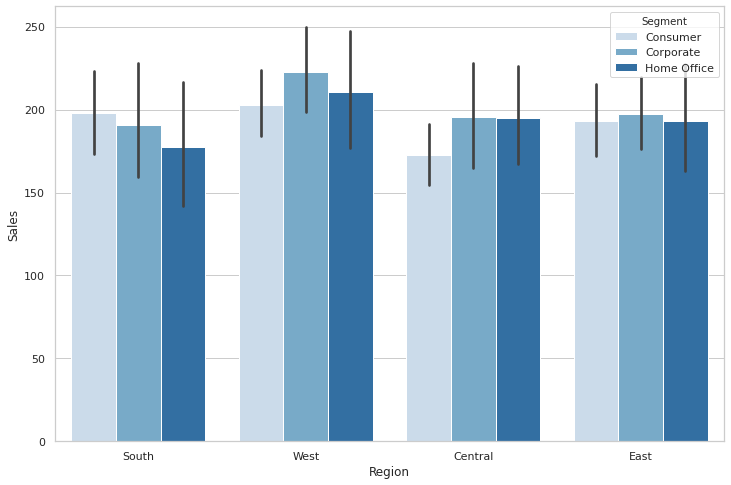

In [33]:
#Segment wise sales in Each region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Sales", hue="Segment", data=ds, palette="Blues")

**Observation:- In case of sales not much difference is seen based on the Segments for any region. Overall 'Corporate' is leading a bit.**

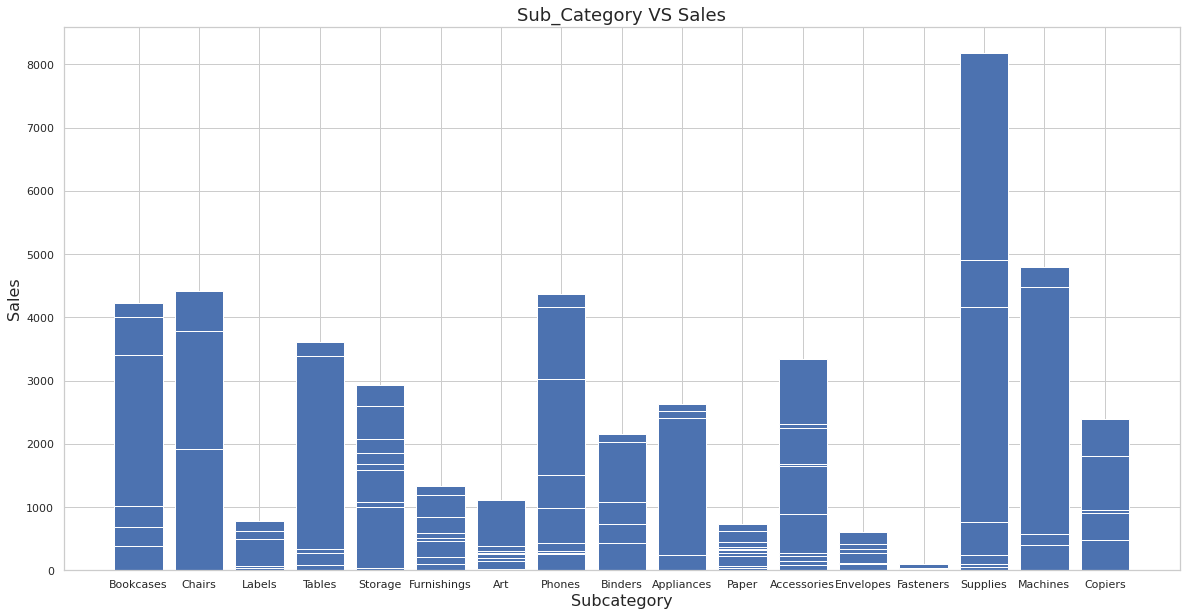

In [34]:
#Sales vs Subcategory
plt.figure(figsize=[20,10])
plt.bar("Sub-Category","Sales",data=ds)
plt.title("Sub_Category VS Sales",fontsize=18)
plt.xlabel("Subcategory", fontsize=16)
plt.ylabel("Sales",fontsize=16)
plt.show()

**Observation:- As we can see, the 'Supplies' sub-category produces maximum sales followed by the 'Machines' sub-category. 'Fasteners' are lagging behind of all.**

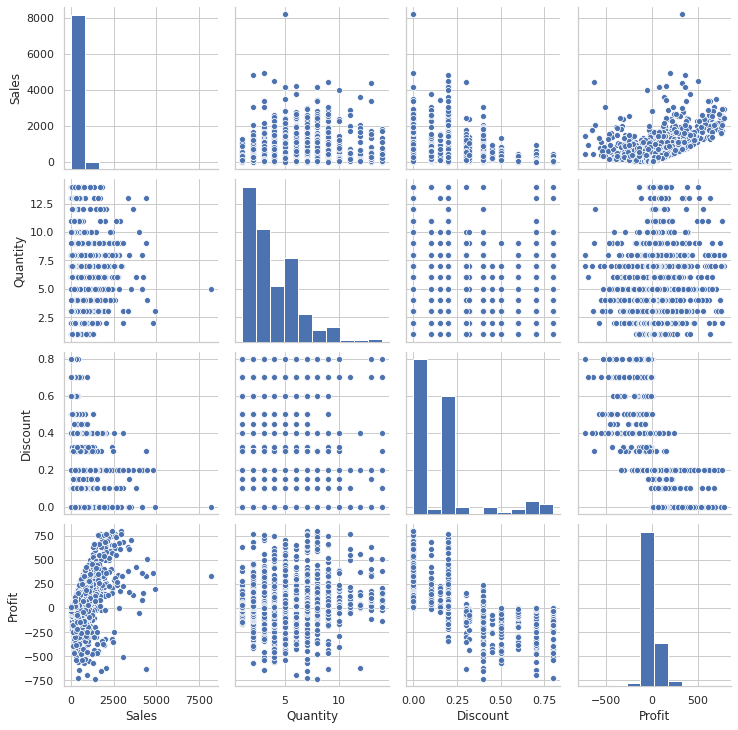

In [35]:
#Let's get some aggregated views from pairplot
sns.pairplot(ds)

Observation:- No such strong linear relations are found here between columns of the Dataset, irregularity is seen allover.

# Let's See If we can get interesting insights using Stats!

In [36]:
#Let's get some insights based on Cities
grouped= ds.groupby("City")
#Aggregated Sales per city
agg_sales=grouped['Sales'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with highest total sales
agg_sales.head()

,City,Sales
0,New York City,197246.023
1,Los Angeles,164434.549
2,San Francisco,109777.212
3,Seattle,96250.488
4,Philadelphia,91772.849


**Observation:- New York City has the most amount of sales followed by Los Angeles and San Fracisco.**

In [37]:
#Aggregated Profit per city
agg_profit=grouped['Profit'].agg(np.sum).sort_values(ascending=False).reset_index()
#Cities with Highest total Profit
agg_profit.head()

,City,Profit
0,New York City,39934.8107
1,Los Angeles,26544.4140
2,Seattle,18916.8467
3,San Francisco,16521.1321
4,Detroit,8200.3235


**Observation:- Similarly most profit is earned from New York City followed by Los Angeles and Seattle.**

In [38]:
#Aggregate Discount per city
agg_dist=grouped['Discount'].agg(np.sum).sort_values(ascending=False).reset_index()

#Cities with highest aggregated Discount
agg_dist.head()

,City,Discount
0,Philadelphia,173.50
1,Houston,139.54
2,Chicago,117.90
3,Dallas,55.50
4,Los Angeles,54.70


**Observation:- Interestingly highest total discount is for Philadelphia followed by Houston and Chicago. Shouldn't they lead the Sales and Profit table as well!**

In [39]:

#Average Sales per city
avg_sales=grouped['Sales'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average sales
avg_sales.head()

,City,Sales
0,Cheyenne,1603.136000
1,Bellingham,1263.413333
2,Independence,1208.685000
3,Burbank,1082.386000
4,Buffalo,906.349600


In [40]:
#Cities with lowest Average sales
avg_sales.tail()
#Average Profit per city
avg_profit=grouped['Profit'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average profit
avg_profit.head()

,City,Profit
0,Independence,487.831500
1,Appleton,277.383150
2,Burbank,254.844600
3,Lehi,225.831300
4,Beverly,218.306467


In [41]:
#Cities with lowest Average profit
avg_profit.tail()

,City,Profit
526,Rockford,-104.500709
527,Normal,-110.023200
528,Yuma,-116.497725
529,Oswego,-178.709200
530,Champaign,-182.352000


In [42]:
#Average Discount per city
avg_dist=grouped['Discount'].agg(np.mean).sort_values(ascending=False).reset_index()
#Cities with highest Average discount
avg_dist.head()

,City,Discount
0,Deer Park,0.8
1,Abilene,0.8
2,Missouri City,0.8
3,Romeoville,0.8
4,Littleton,0.7


In [43]:
#Cities with lowest Average Discount
avg_dist.tail()

,City,Discount
526,Jonesboro,0.0
527,Jefferson City,0.0
528,Jamestown,0.0
529,Saint Paul,0.0
530,Aberdeen,0.0


**Observation:- Something new, in all these average calculations, the Cities which topped the total Sales, total Profit or total Discount, are not leading here. But the overall scinerio can be obtained from these average values.**

In [44]:
import jovian

In [45]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/mukherjeesubha24/superstore-data-analysis


<IPython.core.display.Javascript object>

**Some Feature Engineering to ask some interesting questions to the dataset and get corresponding outputs!!**

In [46]:
#Cities having High Average Discounts
high_dist=avg_dist[avg_dist['Discount'] >=0.7]

In [47]:
#Cities having low Average Discounts
low_dist=avg_dist[avg_dist['Discount']==0]

In [48]:
#Cities having High Average Sales
high_sales=avg_sales[avg_sales['Sales']>500]

In [49]:
#Cities having low Average Sales
low_sales=avg_sales[avg_sales['Sales']<50]

In [50]:
#Cities having High Average Profit
high_profit=avg_profit[avg_profit['Profit']>100]

In [51]:
#Cities having low Average profit
low_profit=avg_profit[avg_profit['Profit']<0]

**So, now we are ready with our useful data. Let us use it to answer the most relevant questions!**

## Asking and Answering Questions

**In this section, I shall ask the dataset some question and will try to get those answers.**



**Q1. Which are the cities where discount is maximum but sales are nominal?**

In [52]:
#Cities with High-Average-Discounts but Low-Average-Sales
merged= pd.merge(high_dist,low_sales, on=['City'],how='inner')
merged

,City,Discount,Sales
0,Deer Park,0.8,6.924
1,Abilene,0.8,1.392
2,Missouri City,0.8,6.370
3,Romeoville,0.8,8.952
4,Pensacola,0.7,2.214
5,Elyria,0.7,1.824
6,Ormond Beach,0.7,2.808


**Ans 1. Here we can see 7 Cities where the Company is giving high discounts but Sales very very low. As already Discounts are high, no question of increasing discount further. Hence here our investment is not fruitful.**

**Q2. What are the cities having high sales as well as high profit?**

In [53]:
#Cities with high Average Sales as well as Average Profit
merged2= pd.merge(high_sales,high_profit, on=['City'], how='inner')
merged2

,City,Sales,Profit
0,Cheyenne,1603.136000,100.196000
1,Bellingham,1263.413333,203.530267
2,Independence,1208.685000,487.831500
3,Burbank,1082.386000,254.844600
4,Beverly,861.063333,218.306467
5,Appleton,835.655000,277.383150
6,Torrance,783.067000,136.287750
7,Lehi,758.363000,225.831300
8,Saint Peters,697.160000,146.403600
9,Norman,675.665000,134.764350


**Ans 2. The stats above are very pleasing. In all these 15 Cities the sales as well as profit is quite good. Hence if we can invest in these cities (in terms of Discount and other aspects), business can increase more. These can be termed as the Hot-Spots.**

**Q3. Are there any city, where sales is high in spite of 0 discount?**

In [54]:
#Cities where Average Discount is less but Average Sales is High
merged3= pd.merge(low_dist,high_sales, on='City', how='inner')
merged3

,City,Discount,Sales
0,Appleton,0.0,835.655000
1,Dubuque,0.0,562.433333
2,Beverly,0.0,861.063333
3,Saint Peters,0.0,697.160000
4,Noblesville,0.0,772.795000
5,Morristown,0.0,539.853333
6,Norman,0.0,675.665000
7,Independence,0.0,1208.685000
8,Harrisonburg,0.0,626.958571
9,Madison,0.0,534.679000


**Ans 3. These 10 cities are generating high average sales in spite of '0' discount! Hence if our investments can be increased in these cities, then huge sales as well as huge profits can be driven from these Cities. These can be termed as the Dark-Horses.**

**Q4. Is there any cities where sales is good but generating loss?**

In [55]:
#Cities with high Average sales but low Average profit
merged4= pd.merge(high_sales,low_profit, on='City', how='inner')
merged4

,City,Sales,Profit
0,Richardson,644.232,-12.24465


**Ans 4.  In Richardson city, good amount of sales are there but the company is going with loss here. Hence focus can be shifted from here or the reasons are to be found!**

**Q5. Are there cities with high discounts yet very low profit margin/LOSS?**

In [56]:

#Cities with high Average discount but low Average profit
merged5= pd.merge(high_dist,low_profit, on='City', how='inner')
merged5

,City,Discount,Profit
0,Deer Park,0.8,-10.3860
1,Abilene,0.8,-3.7584
2,Missouri City,0.8,-9.5550
3,Romeoville,0.8,-14.7708
4,Littleton,0.7,-98.8018
5,Pensacola,0.7,-1.4760
6,Elyria,0.7,-1.3984
7,Ormond Beach,0.7,-1.9656


**Ans 5. The 8 cities above gets highest average Discount, but here the business is generating loss! Either strong focus is to be given in these cities to find out the faults or Discounts are to withdrawn to make up the loss.**

**Q6. Which are the cities with very low discount but high profit?**

In [57]:
#Cities with low Average discount but High Average profit
merged6= pd.merge(low_dist, high_profit, on='City', how='inner')
merged6

,City,Discount,Profit
0,Appleton,0.0,277.383150
1,Vacaville,0.0,110.052800
2,Dubuque,0.0,159.224800
3,Washington,0.0,105.958930
4,Beverly,0.0,218.306467
5,Broken Arrow,0.0,115.104520
6,Saint Peters,0.0,146.403600
7,Muskogee,0.0,110.649150
8,Morristown,0.0,165.842750
9,Edmond,0.0,121.551950


**Ans4. Here are the 18 cities, where the company is not at all providing any discount, yet these cities are genetating good amount of profit. Hence more and more care is to be taken and investments are to be made in these kinds of Hot-Spots!**

# Now Some more visuals with profit:-

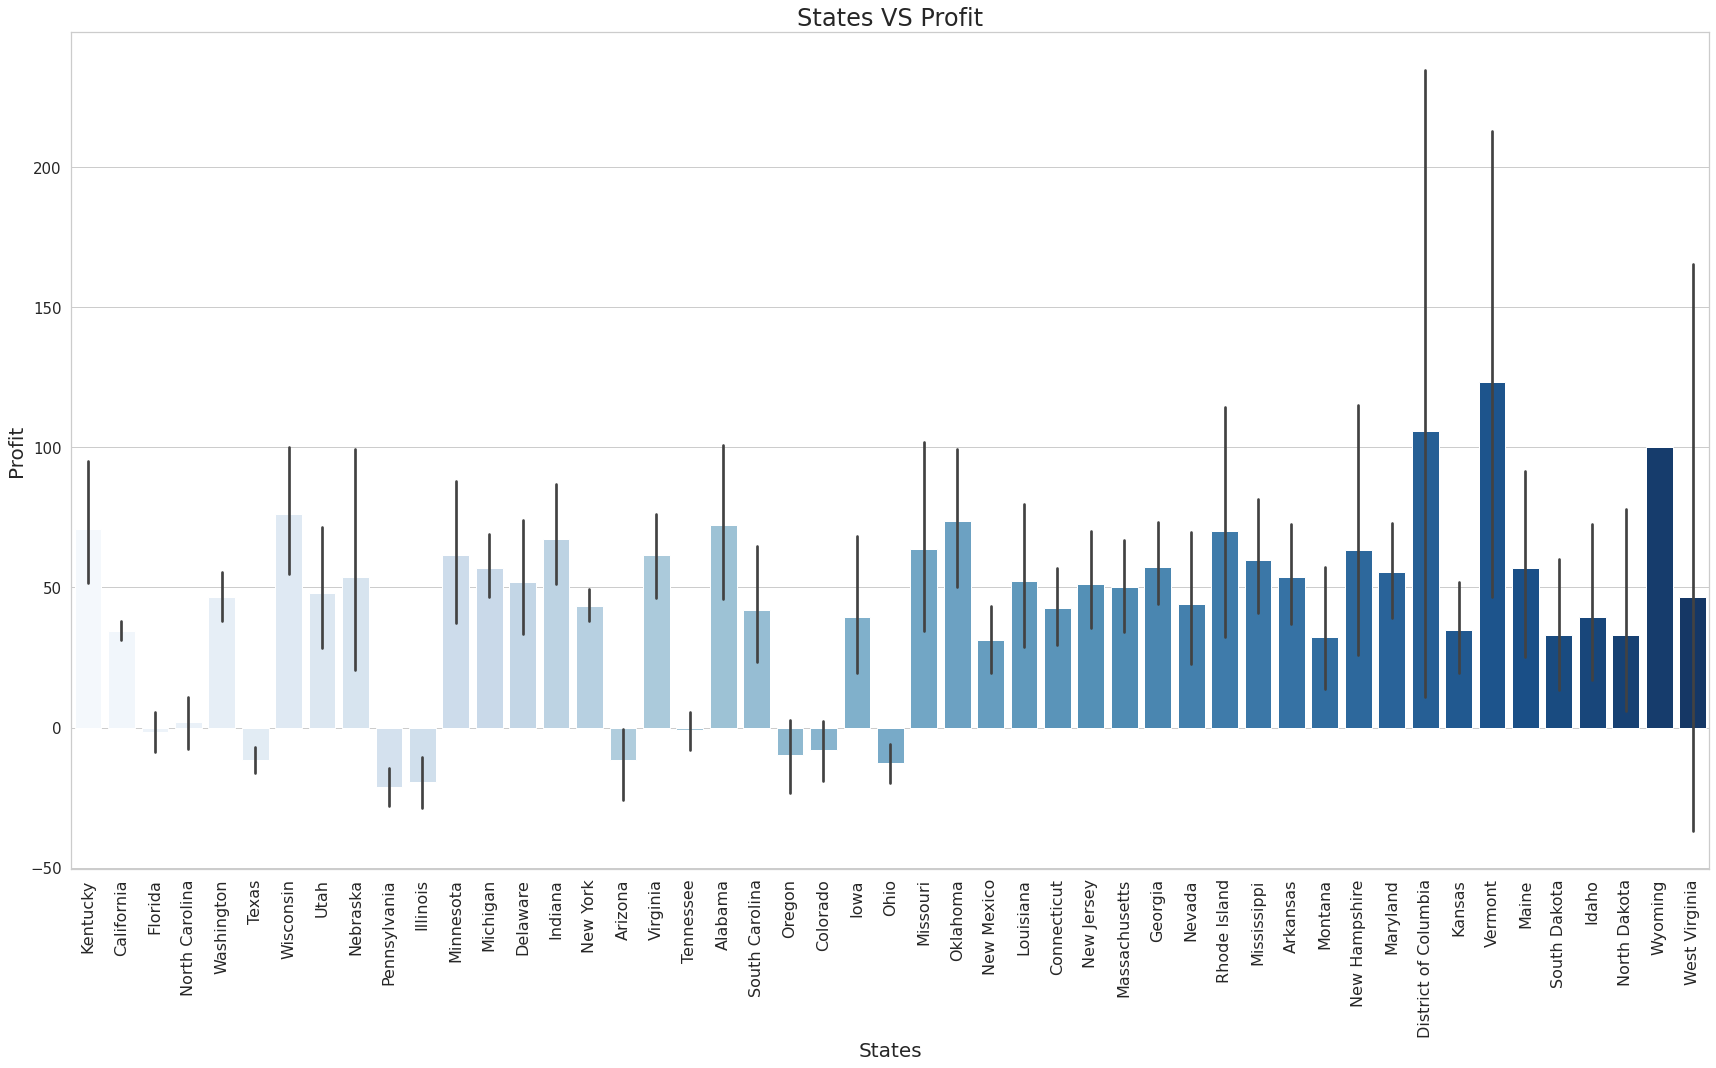

In [58]:
plt.figure(figsize=[24,15])
ax = sns.barplot(x="State", y="Profit", data=ds, palette="Blues",)
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=15)
plt.title("States VS Profit",fontsize=24)
plt.xlabel("States",fontsize=20)
plt.ylabel("Profit",fontsize=20)
plt.tight_layout()

**Observation:- The plot shows, 'District of Columbia', 'Vermont','Wyoming' states are generating highest profits. And States like 'Texas', 'Pennsylvania','Illinois','Arizona','Oregon','Colorado','Ohio' are generating losses. Hence focus has to be given in such States.**

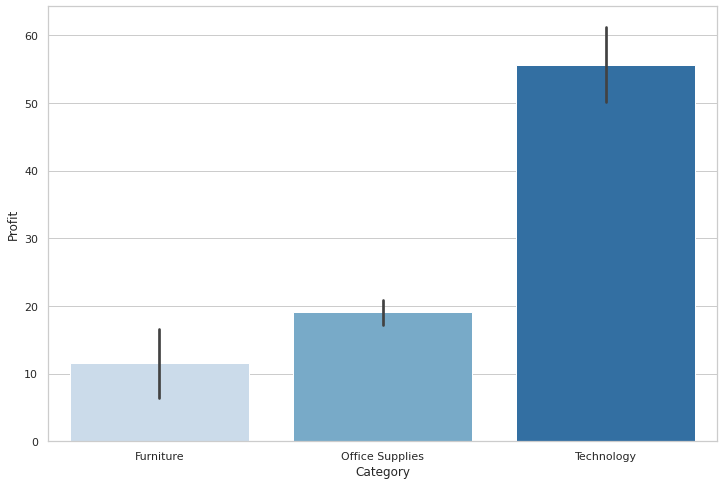

In [59]:
#Category Wise profit in the whole country
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Category", y="Profit", data=ds, palette="Blues")


**Observation:- Highest profit is generated from Category='Technology'. 'Furniture' is lagging the list.**

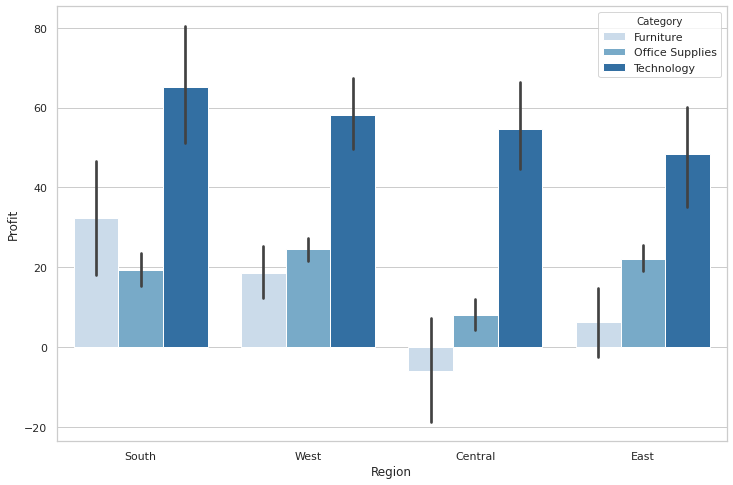

In [60]:
#Category wise Profit in Each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Region", y="Profit", hue="Category", data=ds, palette="Blues")

**Observation:- Simply 'Technology' generates highest profit in every region. And 'Furniture' is lagging in all the regions except South region. Most importantly, at Central region, 'Furniture' is experiencing loss. These points are to be noted and taken care of.**

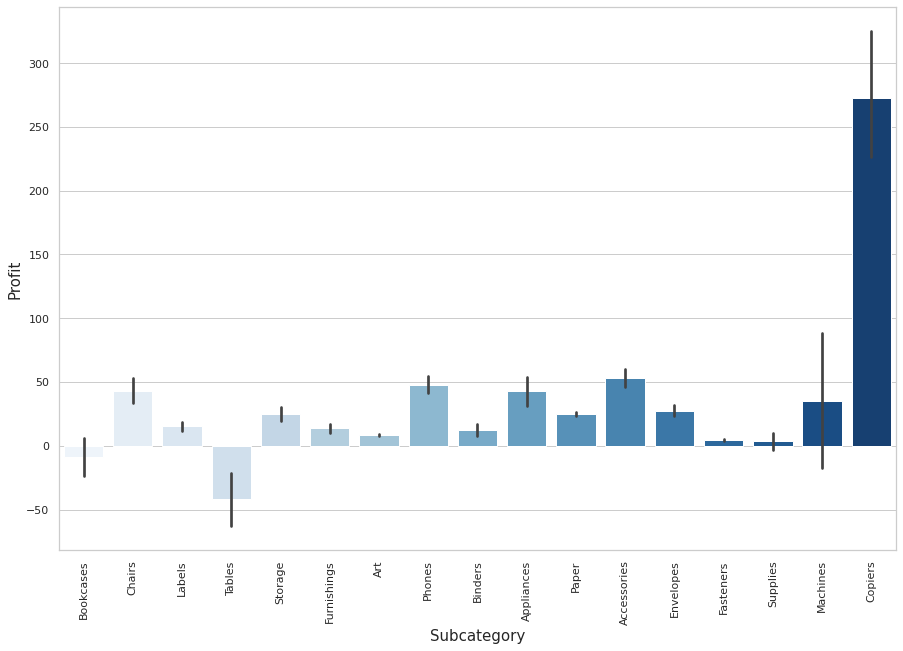

In [61]:
#Subcategory wise profit
plt.figure(figsize=[15,10])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds, palette="Blues")
plt.xlabel("Subcategory", fontsize=15)
plt.ylabel("Profit",fontsize=15)
plt.xticks(rotation=90)
plt.show()


**Observation:- As we can see, 'Copiers' are gaining huge profit. 'Accessories' are also doing good. But 'Tables' and 'Bookcases' are going with loss. Respective steps are to be taken to improve the business in these Subcategories.**

**As we can see, the Profit is maximum in case of Category= Technology, So we should explore that more!**

In [67]:
#Entries with Category=Technology
ds_tech=ds[(ds['Category']=="Technology")]
ds_tech.head()

,Ship Mode,Segment,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
7,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,907.152,6,0.2,90.7152
11,Standard Class,Consumer,Los Angeles,California,West,Technology,Phones,911.424,4,0.2,68.3568
19,Second Class,Consumer,San Francisco,California,West,Technology,Phones,213.480,3,0.2,16.0110
26,Second Class,Consumer,Los Angeles,California,West,Technology,Accessories,90.570,3,0.0,11.7741
35,First Class,Corporate,Richardson,Texas,Central,Technology,Phones,1097.544,7,0.2,123.4737


Text(0, 0.5, 'Sales')

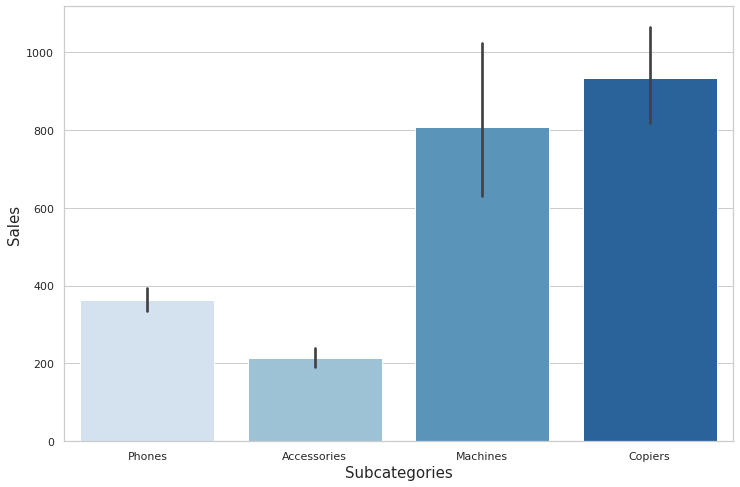

In [68]:
#Let's get the Sales of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Sales", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Sales",fontsize=15)

**Observation:- In category 'Technology', subcategory 'Copiers' is having the highest sales, where 'Accessories' is having lowest amount of sales. 'Machines' subcategory is also performing good.**

Text(0, 0.5, 'Profit')

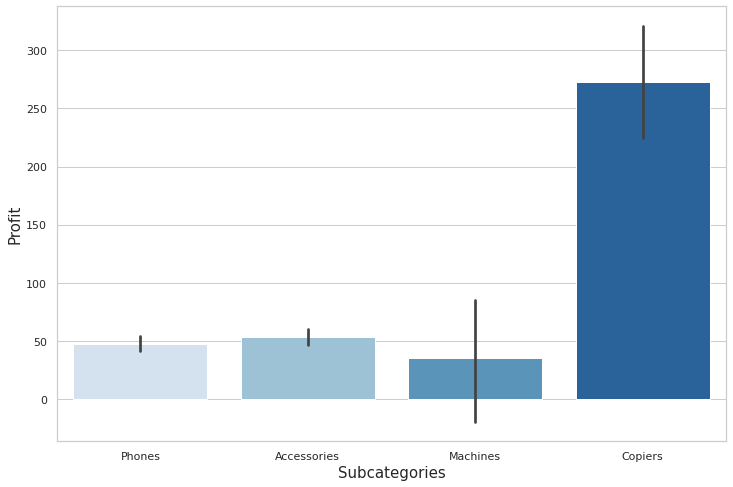

In [69]:
#Let's get the Profit of each Subcategory under Technology
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

**Observation:- It's clear from the picture that 'Copiers' is generating the highest profit as mentioned earlier, but 'Machines' are lagging in this case in spite of generating good amount of sales, as shown previously.**

Text(0, 0.5, 'Profit')

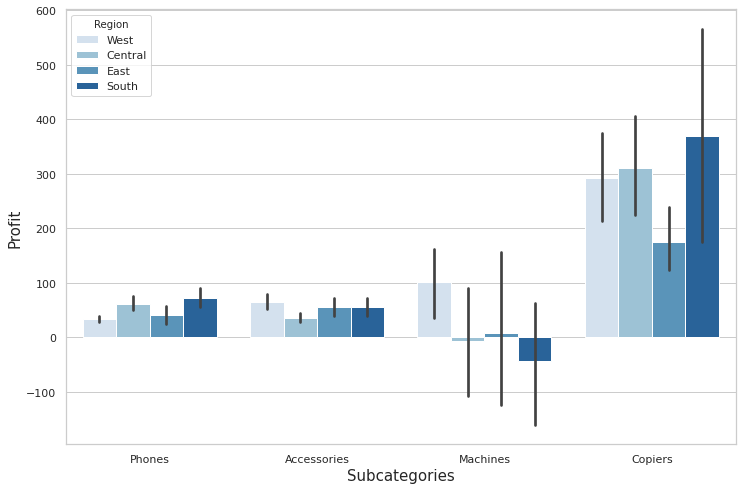

In [70]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

Text(0, 0.5, 'Profit')

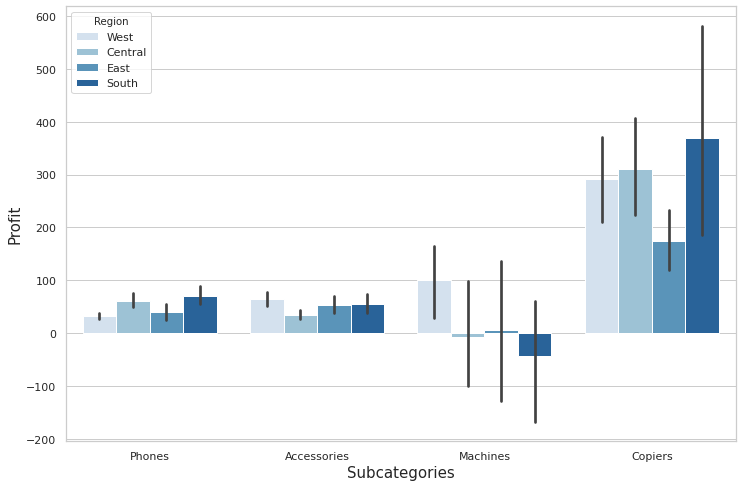

In [71]:
#Let's get the Profit of each Subcategory under Technology for each Region
plt.figure(figsize=[12,8])
ax = sns.barplot(x="Sub-Category", y="Profit",hue="Region", data=ds_tech, palette="Blues")
plt.xlabel("Subcategories",fontsize=15)
plt.ylabel("Profit",fontsize=15)

**Observations:- Here also, same picture can be seen. 'Copiers' is well ahead of others, while 'Machines' is not at all performing well, especially in the 'Second Class', where Consumers are large in Count, as seen earlier. So, further steps are to be talken accordingly!**

In [72]:
import jovian

In [73]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/mukherjeesubha24/superstore-data-analysis


<IPython.core.display.Javascript object>

## Inferences and Conclusion

**We are at the end of the project. We have downloaded the dataset, explored it, cleaned it and analysed it at every possible way. In between all these we have encountered some awesome facts about the data. So, after this exploratory analysis we can conclude our observations and insights in some simple points as follows....**

**1. Large cities, like New York, Los Angeles, Seatle, San Francisco are generating highest amount of Sales as well as Profit.**

**2. In case of Categories, Technology is always leading in terms of Sales and Profit.**

**3. Some cities are there, where company is giving huge discounts but very less sales and profit is generating.**

**4. Also there are cities, where discounts are totaly '0', but they are generating high profits.**

**5. Maximum corporates as well as consumers prefer the Standard class of ship-mode.**

**6. There are cities where sales as well as profit is very low, infact company is going with a loss there.**


**Above insights are just few such key points where the organization should focus more to enhance their business and reduce the loss as much as possible. Company campaigns can be well directed with help of these key notes. Hopefully the whole analysis will help the company to grow in upcoming days. That's all.**


# Thank you!



In [74]:
import jovian

In [75]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/mukherjeesubha24/superstore-data-analysis


<IPython.core.display.Javascript object>

## References and Future Work

**During this projects I got help from various websites, blogs and obviously the video lectures of the Zero to Pandas workshop. Here are some of them,**

**1. https://stackoverflow.com/questions/40885318/create-a-new-dataframe-from-selecting-specific-rows-from-existing-dataframe-pyth**

**2. https://www.geeksforgeeks.org/python-pandas-dataframe-groupby/**

**3. https://stackoverflow.com/questions/20763012/creating-a-pandas-dataframe-from-a-numpy-array-how-do-i-specify-the-index-colum**

**This dataset is so far a gem to me. It has produced some awesome insights and hidden facts. All credits to different statitical calculations and visualisations. In future many such new facts can also be genarated and if we apply some Machine Lerning Models then future profits can also be derived. Depending upon such incredible findings the Organization can be more focused and specific towards it's journey ahead.**

In [78]:
import jovian

In [ ]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Detected Kaggle notebook...
[jovian] Uploading notebook to https://jovian.ml/mukherjeesubha24/superstore-data-analysis


<IPython.core.display.Javascript object>